<h1>Лабораторная работа по курсу "Теоретическая механика"<br>
Динамика системы</h1>

## Задание:
Численно решить дифференциальные уравнения движения механической
системы, построить анимацию движения системы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from scipy.integrate import odeint

In [7]:
# Функция системы уравнений
def odesys(phi_s, t, m_1, m, r, c, c_1):  
    dphi_s = np.zeros(4)
    dphi_s[0] = phi_s[2]
    dphi_s[1] = phi_s[3]
    a11 = (2 * m_1 + m) * r**2 + m * phi_s[1]**2 + 2 * m * r * np.sin(phi_s[0]) # при фи
    a12 = -m * r * np.cos(phi_s[0]) # при s
    b1 = -m * r * phi_s[1] * phi_s[2]**2 * np.cos(phi_s[0]) - 2 * m * (phi_s[1] + r * np.sin(phi_s[0])) * phi_s[2] * phi_s[3] - c_1 * r ** 2 * phi_s[0] - m * g * phi_s[1] * np.cos(phi_s[0])
    a21 = -r * np.cos(phi_s[0])
    a22 = 1
    b2 = phi_s[1] * phi_s[2]**2 - 2 * c * phi_s[1] / m - g * np.sin(phi_s[0])
    dphi_s[2] = (b1 * a22 - a12 * b2) / (a11 * a22 - a12 * a21)
    dphi_s[3] = (b2 * a11 - a21 * b1) / (a11 * a22 - a12 * a21)
    return dphi_s

In [8]:
# Задаём все параметры
g = 9.81  # Ускорение свободного падения
m_1 = 1  # Масса обруча
m = 5  # Масса грузика
r = 1  # Радиус обруча
c = 60  # Жесткость пружин у грузика
c_1 = 5  # Жесткость горизонтальной пружины
t_0 = 0 # начальное время
t_end = 50 # конечное время
phi_0 = np.pi / 2  # Начальный угол поворота
dphi_0 = 1  # Начальное угловое ускорение
s_0 = 0  # Начальное смещение грузика
ds_0 = 0  # Начальное ускорение грузика
iterations = 1201 # частота дискретизации

In [9]:
t = np.linspace(t_0, t_end, iterations)
Y = odeint(odesys, [phi_0, s_0, dphi_0, ds_0], t, (m_1, m, r, c, c_1)) 

phi = Y[:, 0] # значения угла в выбранные моменты времени
s = Y[:, 1]   # значения отклонения груза в выбранные моменты времени
dphi = Y[:, 2]
ds = Y[:, 3]

<IPython.core.display.Javascript object>


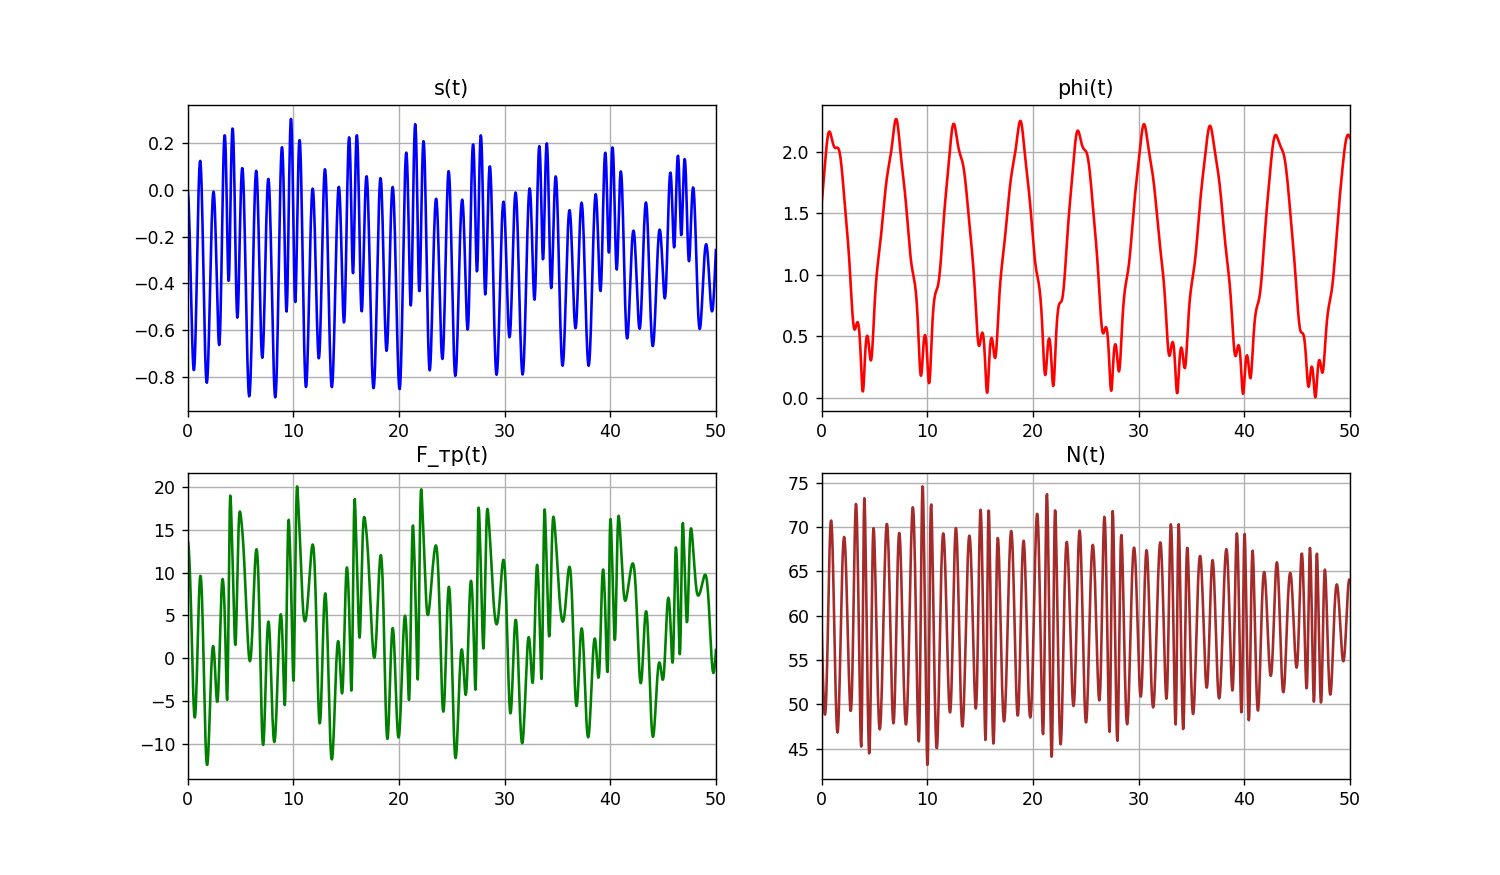

In [10]:
F = (m_1+m)*r*dphi-m*(ds-s_0*phi**2)*np.cos(phi_0)+m*(2*s*phi+s_0*dphi)*np.sin(phi_0)+c_1*r*phi_0
N = m*((ds-s_0*phi**2)*np.sin(phi_0)+(2*s*phi+s_0*dphi)*np.cos(phi_0))+(m_1+m)*g

# Графики искомых зависимостей
fig, ax = plt.subplots(2, 2, figsize=(12, 7))
ax[0][0].plot(t, s, color='blue')
ax[0][0].set_title("s(t)")
ax[0][0].set(xlim=[t_0,t_end])
ax[0][0].grid(True)

ax[0][1].plot(t, phi, color='red')
ax[0][1].set_title('phi(t)')
ax[0][1].set(xlim=[t_0,t_end])
ax[0][1].grid(True)

ax[1][0].plot(t, F, color='green')
ax[1][0].set_title('F_тр(t)')
ax[1][0].set(xlim=[t_0,t_end])
ax[1][0].grid(True)

ax[1][1].plot(t, N, color='brown')
ax[1][1].set_title('N(t)')
ax[1][1].set(xlim=[t_0,t_end])
ax[1][1].grid(True)
plt.show()

In [11]:
# введем некоторые параметры, нужные для рисования модели

alpha = 0.15  # чем меньше значение, тем меньше расстояние "стенок" от центра обруча
Spr_0 = 2   # начальная длина сжатой пружины
BoxL = r*np.sin(alpha)*6/10     # половина длины груза
BoxH = r*np.sin(alpha)*6/10     # половина высоты груза
n = 20       # количество изломов пружины
sh = r / 10     # ширина пружины

In [12]:
# создадим несколько функций, которые будут вычислять координаты фигур

def rotate(x, y, Alpha, x_0, y_0):    # поворот точки с координатами (x, y) относительно точки (x_0, y_0) на угол Alpha
    X = (x - x_0)*np.cos(Alpha) - (y - y_0)*np.sin(Alpha)
    Y = (x - x_0)*np.sin(Alpha) + (y - y_0)*np.cos(Alpha)
    return X + x_0, Y + y_0

def spring(x1, x2, y, x_0, y_0, phi): # рассчет координат изломов горизонтальной пружины c поворотом на угол phi: 
    X_rotated_spring = []             # (x1, y) - начальная точка; (x2, y) - конечная; (x_0, y_0) - центр поворота
    Y_rotated_spring = []
    X_Spr = np.zeros(n)
    Y_Spr = np.zeros(n)
    X_Spr[0] = x1   
    Y_Spr[0] = y
    X_Spr[n-1] = x2
    Y_Spr[n-1] = y     
    for i in range(1, n-1):
        X_Spr[i] = x1+i*(x2-x1)/n
        Y_Spr[i] = y + sh*(-1)**i
    for i in range(n):
        X_rotated, Y_rotated = rotate(X_Spr[i], Y_Spr[i], phi, x_0, y_0)
        X_rotated_spring.append(X_rotated)
        Y_rotated_spring.append(Y_rotated)
    return [X_rotated_spring, Y_rotated_spring]

def box(X, Y, x_0, y_0, phi):         # рассчет координат вершин грузика c поворотом на угол phi:
    X_rotated_box = []                # (X, Y) - центр грузика; (x_0, y_0) - центр поворота
    Y_rotated_box = []
    X_box, Y_box = [X-BoxL, X-BoxL, X+BoxL, X+BoxL, X-BoxL], [Y-BoxH, Y+BoxH, Y+BoxH, Y-BoxH, Y-BoxH]
    for i in range(5):
        X_rotated, Y_rotated = rotate(X_box[i], Y_box[i], phi, x_0, y_0)
        X_rotated_box.append(X_rotated)
        Y_rotated_box.append(Y_rotated)
    return [X_rotated_box, Y_rotated_box]

def circle(X, Y):                     # рассчет координат окружности с центром в (X, Y)
    psi = np.linspace(0, 2 * np.pi, 200)
    X_circle = X + r*np.sin(psi)
    Y_circle = Y + r * np.cos(psi)
    return [X_circle, Y_circle]

<IPython.core.display.Javascript object>


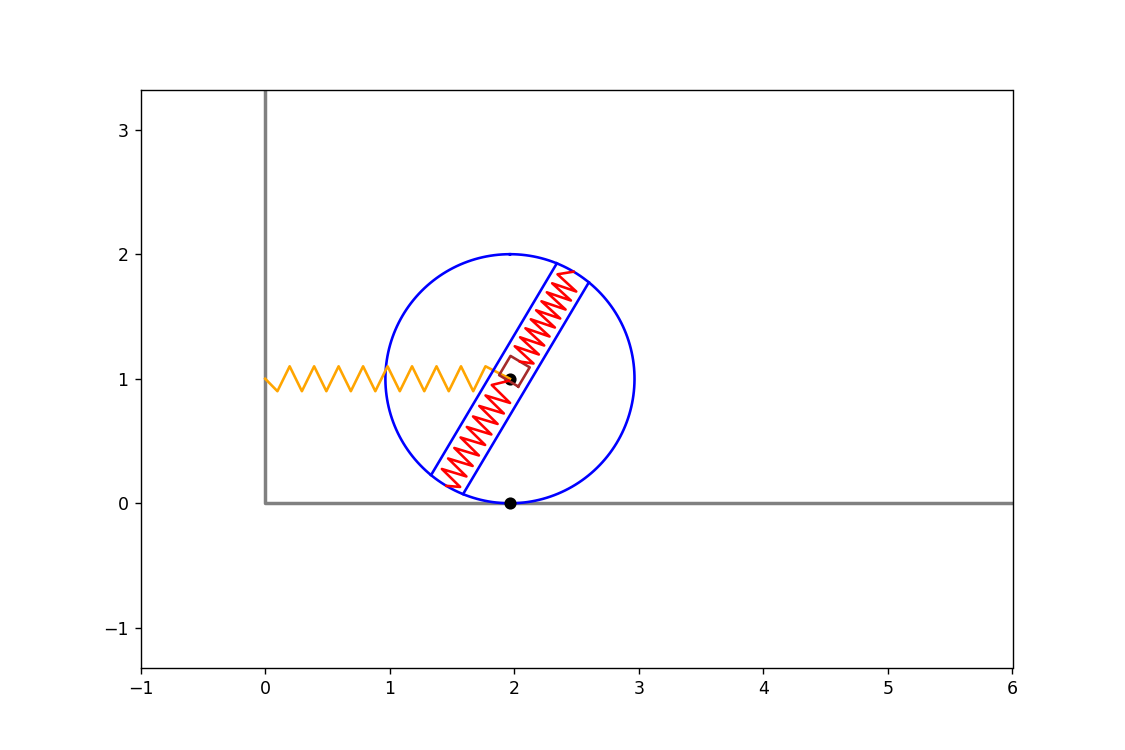

In [13]:
# построение анимации

%matplotlib notebook
fig = plt.figure(figsize=[9, 6])    
ax = fig.add_subplot(1,1,1)         
ax.axis('equal')
ax.set(xlim=[-1, 6], ylim=[-1, 3])

Spr = Spr_0 # сжатие пружины, прикрепленной к стене
X_O, Y_O = Spr + r, r  # координаты центра обруча
Point_O = ax.plot(X_O, Y_O, marker='o', color='black')[0] # центр обруча
ax.plot([0, 0, 20], [20, 0, 0], color='gray', linewidth=2)[0] # стенки системы
Circle = ax.plot(circle(X_O, Y_O)[0], circle(Spr + r + s[0], r)[1], color='blue')[0] # обруч
Point_B = ax.plot(X_O, 0, marker='o', color='black')[0] # точка соприкосновения обруча с полом
Drawn_Spring1 = ax.plot(spring(0, X_O, Y_O, 0, 0, 0)[0], spring(0, X_O, Y_O, 0, 0, 0)[1], color='orange')[0] # пружина, прикреаленная к стене
Box = ax.plot(box(X_O + s[0], Y_O + s[0], X_O, Y_O, phi[0])[0], box(X_O + s[0], Y_O + s[0], X_O, Y_O, phi[0])[1], color='brown')[0] # грузик
Drawn_Spring2 = ax.plot(spring(Spr, X_O - s[0] - BoxL, Y_O, X_O, Y_O, phi[0])[0], spring(Spr, X_O - s[0] - BoxL, Y_O, X_O, Y_O, phi[0])[1], color='red')[0] # первая внутренняя пружина
Drawn_Spring3 = ax.plot(spring(X_O - s[0] + BoxL, Spr + 2 * r, Y_O, X_O, Y_O, phi[0])[0], spring(X_O - s[0] + BoxL, Spr + 2 * r, Y_O, X_O, Y_O, phi[0])[1], color='red')[0] # вторая внутренняя пружина
Wall1 = ax.plot([Spr+r*(1+np.cos(-alpha + phi[0])), Spr+r*(1+np.cos(alpha+np.pi + phi[0]))], # первая стенка желоба
                [r*(1+np.sin(-alpha + phi[0])), r*(1+np.sin(alpha+np.pi + phi[0]))], color='blue')[0]
Wall2 = ax.plot([Spr+r*(1+np.cos(-alpha+np.pi + phi[0])), Spr+r*(1+np.cos(alpha + phi[0]))], # вторая стенка желоба
                [r*(1+np.sin(-alpha+np.pi + phi[0])), r*(1+np.sin(alpha + phi[0]))], color='blue')[0]


def TheMagicOfTheMovement(i):
    Spr = Spr_0 - phi[i]*r 
    X_O, Y_O = Spr + r, r
    Point_O.set_data(X_O, Y_O)
    Circle.set_data(circle(X_O, Y_O)[0], circle(X_O, Y_O)[1])
    Point_B.set_data(X_O, 0)
    Drawn_Spring1.set_data(spring(0, X_O, Y_O, 0, 0, 0)[0], spring(0, X_O, Y_O, 0, 0, 0)[1])
    Box.set_data(box(X_O + s[i], Y_O, X_O, Y_O, phi[i])[0], box(X_O + s[i], Y_O, X_O, Y_O, phi[i])[1])
    Drawn_Spring2.set_data(spring(Spr, X_O + s[i] - BoxL, Y_O, X_O, Y_O, phi[i])[0], spring(Spr, X_O + s[i] - BoxL, Y_O, X_O, Y_O, phi[i])[1])
    Drawn_Spring3.set_data(spring(X_O + s[i] + BoxL, Spr + 2 * r, Y_O, X_O, Y_O, phi[i])[0], spring(X_O + s[i] + BoxL, Spr + 2 * r, Y_O, X_O, Y_O, phi[i])[1])
    Wall1.set_data([Spr+r*(1+np.cos(-alpha + phi[i])), Spr+r*(1+np.cos(alpha+np.pi + phi[i]))],
                [r*(1+np.sin(-alpha + phi[i])), r*(1+np.sin(alpha+np.pi + phi[i]))])
    Wall2.set_data([Spr+r*(1+np.cos(-alpha+np.pi + phi[i])), Spr+r*(1+np.cos(alpha + phi[i]))],
                [r*(1+np.sin(-alpha+np.pi + phi[i])), r*(1+np.sin(alpha + phi[i]))])
    return [Circle, Point_O, Point_B, Drawn_Spring1, Box, Drawn_Spring2, Wall1, Wall2]

kino = animation.FuncAnimation(fig, TheMagicOfTheMovement, frames=iterations, interval=100) # Анимация
kino